In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [6]:
df_exploded = df.explode("job_skills")

<Axes: xlabel='job_skills'>

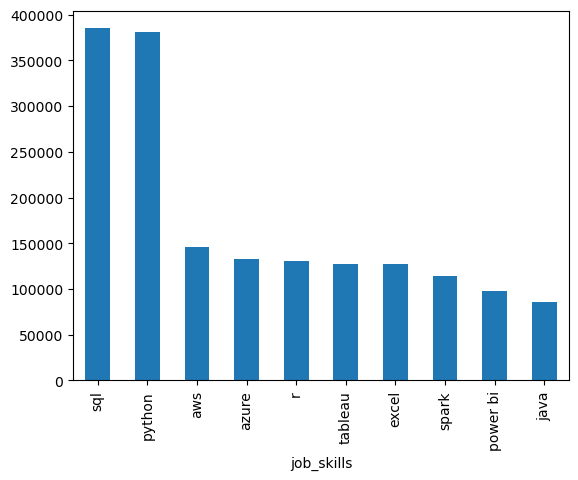

In [9]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [17]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [13]:
df_skills_count = skills_count.reset_index(name = 'count')

In [20]:
df_skills_count = df_skills_count.sort_values(by='count', ascending = False)
df_skills_count

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1166,Machine Learning Engineer,blazor,1
1175,Machine Learning Engineer,clickup,1
1213,Machine Learning Engineer,gatsby,1
567,Data Analyst,nuxt.js,1


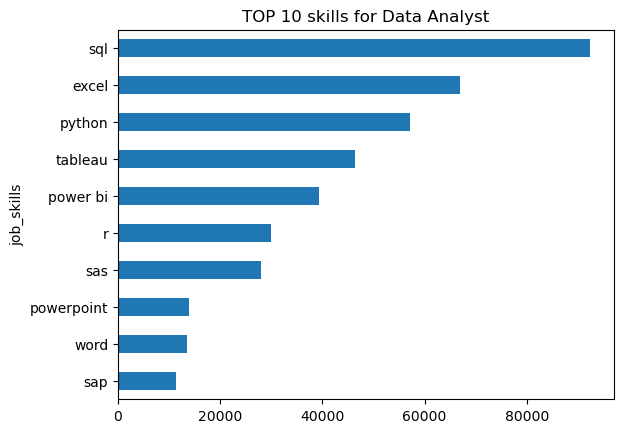

In [34]:
targeted_job = 'Data Analyst'
top = 10
df_targeted = df_skills_count[df_skills_count['job_title_short'] == targeted_job].head(top)
df_targeted.plot(kind ='barh', x = 'job_skills', y = 'count')
plt.gca().invert_yaxis()
plt.title(f"TOP {top} skills for {targeted_job}")
plt.legend().set_visible(False)
plt.show()